<a href="https://colab.research.google.com/github/jolex007/COS_DL/blob/master/2_HomeWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Второе домашнее задание



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Описание нейросети

In [ ]:
def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    ### START CODE HERE ###
    n_x = 2
    n_h = 4
    n_y = 1
    ### END CODE HERE ###
    return (n_x, n_h, n_y)

## Инициализация параметров

In [ ]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(2) # ЭТУ_СТРОКУ_НЕ_РЕДАКТИРОВАТЬ
    
    ### START CODE HERE ###
    W1 = np.random.randn(n_h, n_x) * 0.05
    b1 = np.ones((n_h, 1)) * (1.)
    W2 = np.random.randn(n_y, n_h) * 0.05
    b2 = np.ones((n_y, 1)) * (1.)
    ### END CODE HERE ###
        
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

## Forward propogation

In [ ]:
def forward_propagation(X, parameters, activation_func):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    activation_func -- function of activation
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    ### START CODE HERE ###
    #print("b1 shape is", b1.shape, "W1 shape is", W1.shape, "X shape is", X.shape)
    Z1 = W1 @ X + b1
    A1 = activation_func(Z1)
    Z2 = W2 @ A1 + b2
    A2 = activation_func(Z2)
    ### END CODE HERE ###
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

## Backward propagation

In [ ]:
def compute_cost(A2, Y, parameters):
    """
    Computes the cross-entropy cost given in equation (formula 4)
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    
    Returns:
    cost -- cross-entropy cost given equation (13)
    """
    
    m = Y.shape[1] # number of example

    
    ### START CODE HERE ###
    
    #logprobs = None
    cost = -1./m * (Y * np.log(A2) + (1 - Y) * np.log(1 - A2)).sum()
    
    ### END CODE HERE ###
    
    return cost

In [ ]:
def backward_propagation(parameters, cache, X, Y, diff_activation_func):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    diff_activation_func -- diff of activation function
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    A1 = cache["A1"]
    A2 = cache["A2"]
    Z1 = cache["Z1"]
    Z2 = cache["Z2"]

    ### START CODE HERE ###
    dZ2 = A2 - Y
    dW2 = 1./m * np.dot(dZ2, A1.T)
    db2 = 1./m * dZ2.sum()
    dZ1 = np.dot(W2.T, dZ2) * diff_activation_func(Z1)
    dW1 = 1./m * np.dot(dZ1, X.T)
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims=True)
    ### END CODE HERE ###
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

## Обновление параметров

In [ ]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
   
    ### START CODE HERE ###
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    ### END CODE HERE ###
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [ ]:
def nn_model(X, Y, n_h, activation_func, diff_activation_func, num_iterations = 10000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    func -- function of activation
    diff_func -- diff of activation function
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Инициализируйте параметры. Inputs: "n_x, n_h, n_y". Outputs = "W1, b1, W2, b2, parameters".
    
    ### START CODE HERE ###
    parameters = initialize_parameters(n_x, n_h, n_y)
    ### END CODE HERE ###
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    
    # Loop (градиентный спуск)

    for i in range(0, num_iterations):
        
        ### START CODE HERE ###
        # Шаг forward propagation
        A2, cache = forward_propagation(X, parameters, activation_func)
        
        # Подсчет функции потерь
        cost = compute_cost(A2, Y, parameters)
 
        # Шаг backpropagation
        grads = backward_propagation(parameters, cache, X, Y, diff_activation_func)

        # Обновление весов
        parameters = update_parameters(parameters, grads)
        
        ### END CODE HERE ###
        
        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0:
            print("Cost after iteration %i: %f" %(i, cost))

    return parameters

## Вывод предсказания


In [ ]:
def predict(parameters, X, activation_func, threshold = 0.5):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    threshold -- used for defining prediction
    activation_func -- activation function
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    ### START CODE HERE ### (≈ 2 lines of code)
    A2, cache = forward_propagation(X, parameters, activation_func)
    predictions = (A2>threshold).astype(int)
    ### END CODE HERE ###
    
    return predictions

## Загрузка датасета

In [ ]:
def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y

In [ ]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.figure(figsize=(14,8))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    
    #plt.figure(figsize=(14,8))
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
    #plt.show()

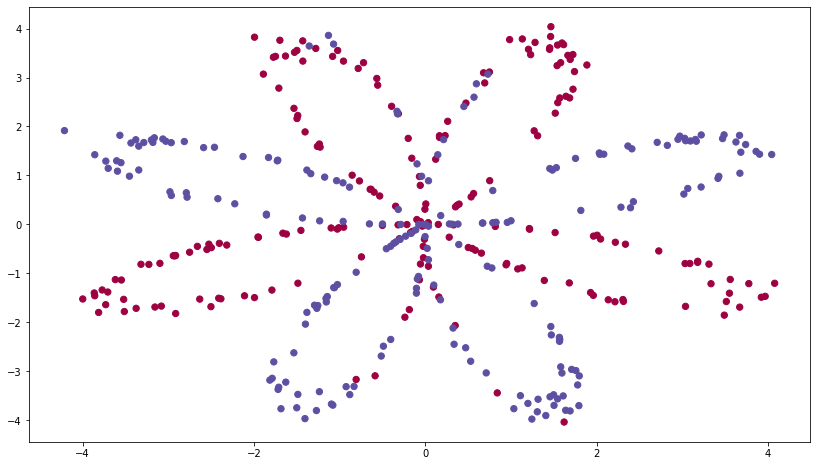

In [ ]:
X, Y = load_planar_dataset() #загружаем датасет
plt.figure(figsize=(14,8))
plt.scatter(X[0, :], X[1, :], c=Y[0], s=40, cmap=plt.cm.Spectral);

## Дополнительные функции

In [ ]:
def sigmoid(x):
    return 1. / (np.exp(-x) + 1)

def sigmoid_diff(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [ ]:
def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

def tanh_diff(x):
    return 4. / ((np.exp(x) + np.exp(-x)) ** 2)

## Обучение и предсказание

Cost after iteration 0: 0.871026
Cost after iteration 100: nan
Cost after iteration 200: nan
Cost after iteration 300: nan
Cost after iteration 400: nan
Cost after iteration 500: nan


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in log


Cost after iteration 600: nan
Cost after iteration 700: nan
Cost after iteration 800: nan
Cost after iteration 900: nan


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

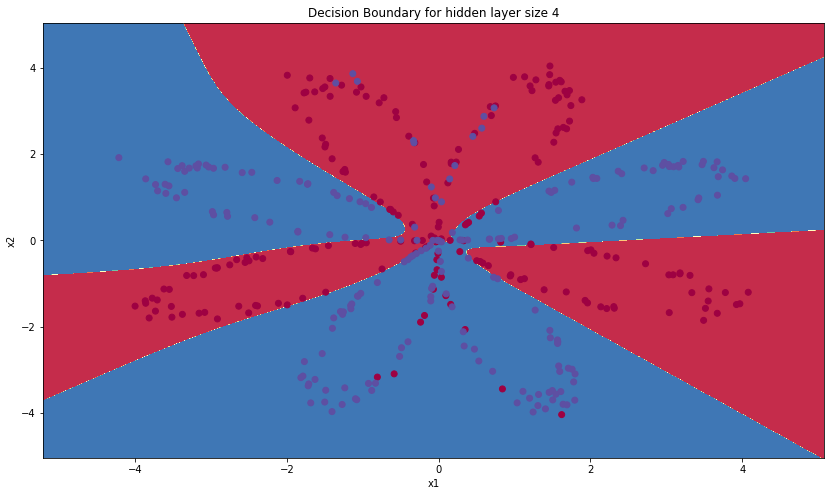

In [ ]:
parameters = nn_model(X, Y, 4, tanh, tanh_diff, num_iterations = 1000, print_cost=True)

# Отрисуем вывод нейросети на плоскости
plot_decision_boundary(lambda x: predict(parameters, x.T, tanh), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))